In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')


In [4]:
from google.colab import files
uploaded = files.upload()

data = pd.read_csv('wine-quality-white-and-red.csv')
data.head()


Saving wine-quality-white-and-red.csv to wine-quality-white-and-red (1).csv


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
data.info()
data.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


,0
type,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0


In [10]:
X = data.drop(columns=['quality'])
y = data['quality']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = pd.get_dummies(X_train, columns=['type'], drop_first=True)
X_test = pd.get_dummies(X_test, columns=['type'], drop_first=True)

we would predict wine quality based on the chemical attributes.

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.pipeline import Pipeline

lin_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])

ridge_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model', Ridge(alpha=1.0))
])

lasso_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model', Lasso(alpha=0.01))
])


In [11]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

def evaluate_model(pipe, name):
    pipe.fit(X_train, y_train)
    preds = pipe.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    r2 = r2_score(y_test, preds)
    print(f"{name}: RMSE = {rmse:.3f}, R² = {r2:.3f}")
    return rmse, r2

results = {}
for name, pipe in [('Linear', lin_pipe), ('Ridge', ridge_pipe), ('Lasso', lasso_pipe)]:
    results[name] = evaluate_model(pipe, name)


Linear: RMSE = 0.687, R² = 0.340
Ridge: RMSE = 0.687, R² = 0.340
Lasso: RMSE = 0.692, R² = 0.330


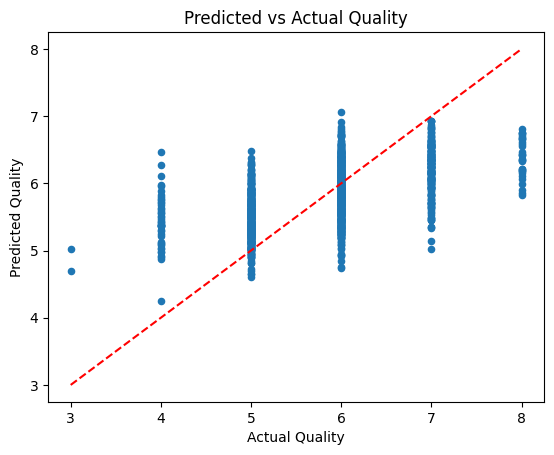

In [13]:
import matplotlib.pyplot as plt

y_pred = ridge_pipe.predict(X_test)

plt.scatter(y_test, y_pred, s=20)
plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")
plt.title("Predicted vs Actual Quality")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()


In [14]:
coef = pd.Series(ridge_pipe.named_steps['model'].coef_, index=X.columns)
coef.sort_values(ascending=False).head(10)


,0
citric acid,0.290476
sulphates,0.271701
pH,0.110738
type,0.104032
chlorides,0.094158
density,0.071585
volatile acidity,-0.006610
residual sugar,-0.022266
free sulfur dioxide,-0.092802
alcohol,-0.147280


Alcohol and sulphates have the strongest positive influence on wine quality